In [493]:
from sklearnex import patch_sklearn
patch_sklearn()
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.datasets import load_diabetes
# font to 맑은 고딕
mpl.rc('font', family='Malgun Gothic')
# 그래프에서 마이너스 폰트 깨지는 것을 방지
mpl.rcParams['axes.unicode_minus'] = False
# ipykernel HTML import
from IPython.display import HTML

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [494]:
result = load_diabetes(as_frame=True)
result.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [495]:
print(result['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [496]:
df = result['frame']
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [497]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [498]:
from scipy import stats
z = np.abs(stats.zscore(df))

threshold = 2
print(np.where(z > threshold))

df = df[(z < threshold).all(axis=1)]
df

(array([  5,   7,   9,  10,  10,  11,  15,  15,  23,  23,  26,  26,  29,
        32,  32,  32,  32,  33,  35,  38,  41,  41,  43,  57,  58,  71,
        72,  76,  76,  77,  79,  82,  84,  84,  86,  87,  92,  93, 106,
       109, 110, 114, 114, 115, 117, 123, 123, 123, 127, 129, 130, 130,
       131, 137, 138, 138, 141, 141, 141, 145, 152, 161, 161, 161, 164,
       166, 167, 168, 168, 169, 170, 171, 174, 186, 187, 202, 204, 208,
       214, 215, 215, 216, 217, 220, 223, 224, 226, 230, 230, 242, 245,
       248, 248, 248, 251, 251, 254, 254, 256, 256, 260, 261, 261, 262,
       262, 262, 266, 269, 273, 276, 282, 285, 286, 287, 287, 290, 304,
       311, 321, 321, 321, 322, 322, 323, 323, 324, 327, 332, 336, 340,
       344, 346, 346, 349, 349, 350, 350, 352, 352, 353, 354, 359, 362,
       362, 364, 365, 366, 367, 371, 374, 375, 376, 376, 379, 379, 382,
       387, 390, 394, 396, 402, 403, 405, 405, 405, 406, 408, 414, 414,
       416, 418, 423, 425, 425, 428, 428, 432, 433, 441], dtype

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
436,-0.056370,-0.044642,-0.074108,-0.050427,-0.024960,-0.047034,0.092820,-0.076395,-0.061176,-0.046641,48.0
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0


<Axes: xlabel='target', ylabel='Density'>

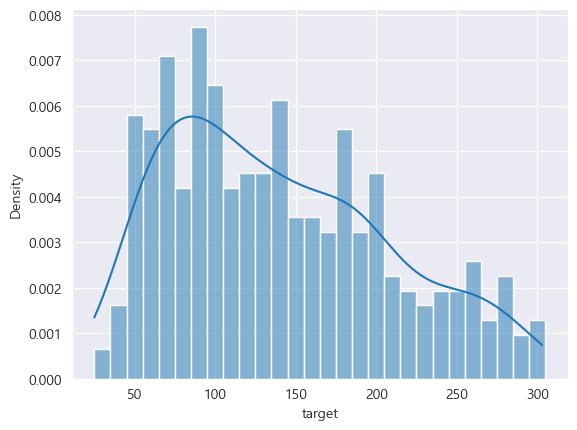

In [499]:

sns.histplot(df['target'], binwidth=10, kde=True, stat='density')



In [500]:
from itertools import combinations
# 
# for data in combinations(df.columns[:-2], 1):
#     result = df[data[0]] / df[data[1]]
#     plt.scatter(result, df['target'])
#     plt.scatter(1/result, df['target'])
#     plt.xlim(-10, 10)
#     plt.title(" ".join(data))
#     plt.show()


from scipy import stats
# for col in combinations(df.columns[:-2],2):
#     ax = sns.scatterplot(data=df, x=col[0], y=col[1], hue='target')
#     print(stats.linregress(df[col[0]], df[col[1]]
#                            )[2], col)
#     plt.title(col)
#     plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8500\3156061624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['targetBin'] = pd.cut(df['target'], bins=list(range(0,331,30)), labels=[str(i*30) + " - "+ str((i+1)*300) for i in range(11)])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8500\3156061624.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['targetBin'] = df['targetBin'].astype('category')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8500\3156061624.py:6: SettingWithCopy

<Axes: >

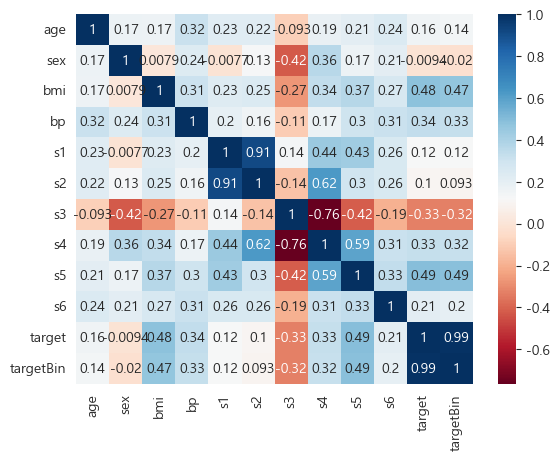

In [501]:
df['targetBin'] = pd.cut(df['target'], bins=list(range(0,331,30)), labels=[str(i*30) + " - "+ str((i+1)*300) for i in range(11)])
# df['targetBin'] = pd.cut(df['target'], bins=[0, 50, 100, 150, 200, 300], labels=['0-50', '50-100', '100-150', '150-200', '200-300'])
# df['targetBin'] = pd.cut(df['target'], bins=[0, 100, 200, 350], labels=['0-100', '100-200', '200-350'])
# df['targetBin'] = pd.cut(df['target'], bins=[0, 150, 350], labels=['0-150', '150-350'])
df['targetBin'] = df['targetBin'].astype('category')
df['targetBin'] = df['targetBin'].cat.codes
# df = df[df['targetBin'].isin(range(1,11,1))]
sns.heatmap(df.corr(), annot=True, cmap='RdBu')

In [502]:
from sklearn.model_selection import train_test_split

X = df.drop(['target','targetBin'], axis=1)
X = df[
    [   
        # 'age',
        'bmi',
        'bp',
        's3',
        's4',
        's5',
        's6',
     ]
]
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

In [503]:
# pd.get_dummies(df['targetBin'])
# from sklearn.preprocessing import OrdinalEncoder
# 
# enc = OrdinalEncoder()
# y_train_enc = enc.fit_transform(y_train.to_numpy().reshape(-1, 1))
# y_train_enc
# 


# from sklearn.preprocessing import KBinsDiscretizer
# 
# scaler = KBinsDiscretizer
# scaler.fit(y_train)
# X_train_scaled = scaler.transform(y_train)
# X_test_scaled = scaler.transform(y_train)
# X_train_scaled

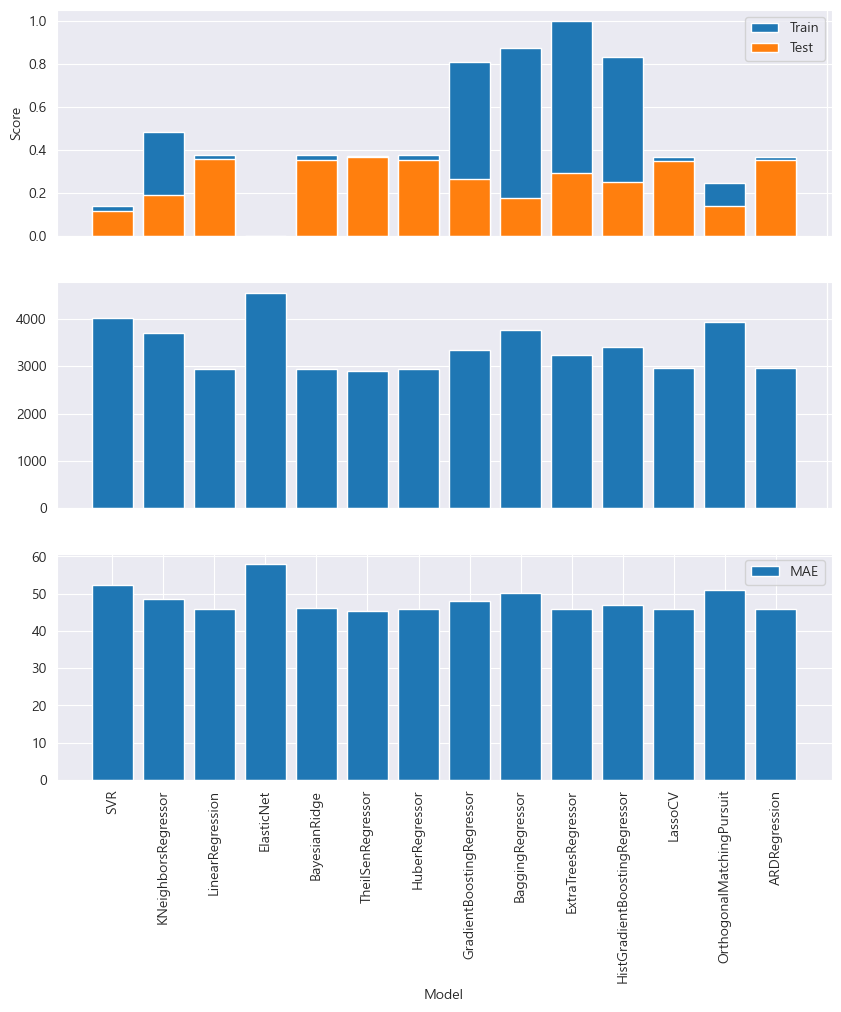

In [504]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge, RANSACRegressor, HuberRegressor, \
    MultiTaskElasticNetCV, ARDRegression
from sklearn.linear_model import PassiveAggressiveRegressor, LassoCV
from sklearn.linear_model import ElasticNet, TheilSenRegressor,\
    OrthogonalMatchingPursuit
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, VotingRegressor, \
    StackingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


modelList = [
    SVR,
    KNeighborsRegressor,
    LinearRegression,
    ElasticNet,
    BayesianRidge,
    # PassiveAggressiveRegressor,
    TheilSenRegressor,
    # RANSACRegressor,
    HuberRegressor,
    GradientBoostingRegressor,
    BaggingRegressor,
    ExtraTreesRegressor,
    # StackingRegressor,
    # VotingRegressor,
    HistGradientBoostingRegressor,
    LassoCV,
    OrthogonalMatchingPursuit,
    ARDRegression,
]

resultTest = []
resultTrain = []
mse = []
mae = []


for model in modelList:
    modelActive = model()
    modelActive.fit(X_train, y_train)
    result_test = modelActive.score(X_test, y_test)
    result_train = modelActive.score(X_train, y_train)
    
    resultTest.append(result_test)
    resultTrain.append(result_train)
    mse.append(mean_squared_error(y_test, modelActive.predict(X_test)))
    mae.append(mean_absolute_error(y_test, modelActive.predict(X_test)))

label = list(map(lambda x : str(x).split('.')[-1].split("'")[0], modelList))
ticks = ['' for x in range(len(modelList))]
fig, ax = plt.subplots(3,1, figsize=(10,10))
plt.axes(ax[0])
plt.bar(label, resultTrain)
plt.bar(label, resultTest)
plt.xticks(ticks)
# plt.ylim(0.4, 0.6)
plt.ylabel('Score')
plt.legend(['Train', 'Test'])
plt.axes(ax[1])
plt.bar(label, mse, label='MSE')
plt.xticks(ticks)
plt.axes(ax[2])
plt.bar(label, mae, label='MAE')
plt.legend()
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.show()


In [505]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500000000, solver='sgd').fit(X_train, y_train)
regr.predict(X_test[:2])

regr.score(X_test, y_test)


0.33142288360250394

In [506]:
from sklearn.linear_model import TweedieRegressor

model = TweedieRegressor(
    power = 0,
    link = 'log',
)
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
result

0.34897531317035013

In [507]:
from sklearnex import unpatch_sklearn
# unpatch_sklearn()

from sklearn.ensemble import RandomForestRegressor
# {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}

detailmodelScore= []
# for num in range(1, len(y_train) % 3):
model = TheilSenRegressor(
    max_iter=1000000
)
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
detailmodelScore.append(result)

detailmodelScore

[0.3611417917711339]

In [508]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures
# 
# polynomial_regression = make_pipeline(
#     PolynomialFeatures(degree=3, include_bias=False),
#     LinearRegression(),
# )
# # polynomial_regression
# 
# model = polynomial_regression
# model.fit(X_train, y_train)
# result = model.score(X_test, y_test)
# result
# detailmodelScore.append(result)